## **Health Insurance Premium Prediction**

**While performing the model for age less than 25, I found that the error was 73%, which is higher than the 10% business requirement. So I decided to investigate and requested new data with an additional feature called the **young-age genetic factor**. Now I am going to run the model again to check the updated error..**

**Problem Understanding**
  
The rising complexity of medical expenses has made it increasingly difficult for insurance companies to determine fair and accurate premium pricing.
To address this challenge, this project aims to develop a predictive machine learning model capable of estimating health insurance premiums based on individual health and lifestyle factors such as age, BMI, smoking habits, and medical history.

**Objective:**
  
- Develop a high-accuracy (>97%) predictive model. The percentage difference between 
  the predicted and actual value on a minimum of 95% of the errors should be less than 
  10%. 
- Deploy the model in the cloud so that an insurance underwriter can run it from anywhere. 
- Create an interactive Streamlit application that an underwriter can use for predictions. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
import warnings
warnings.filterwarnings("ignore")


<h2 align="center" style="color:blue; font-weight:bold; font-size:30px;">Data Loading</h2>


In [2]:
df = pd.read_excel("premiums_young_with_gr.xlsx")
df.head(15)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1
5,22,Female,Southwest,Unmarried,0,Underweight,Regular,Freelancer,25L - 40L,30,High blood pressure,Gold,15473,3
6,19,Male,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,<10L,8,No Disease,Bronze,4097,0
7,18,Female,Northwest,Unmarried,1,Underweight,No Smoking,Salaried,<10L,5,Diabetes & High blood pressure,Bronze,8187,3
8,23,Male,Northwest,Unmarried,0,Underweight,No Smoking,Salaried,<10L,8,No Disease,Bronze,5387,1
9,20,Female,Northeast,Unmarried,0,Normal,Occasional,Salaried,10L - 25L,18,No Disease,Bronze,8866,5


In [5]:
df.shape

(20096, 14)

In [6]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4


<h2 align="center" style="color:blue; font-size:30px; font-weight:bold;">Exploratory Data Analysis & Data Cleaning</h2>


## **Handle Missing Values**

In [7]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

## **Handle Duplicates**

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


## **Data Cleaning: number_of_dependants**

In [12]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

**I observed some negative values in number_of_dependants. To address this, I replaced them with their absolute values to ensure all entries were positive.**

In [13]:
df['number_of_dependants'] = df['number_of_dependants'].abs()

df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


## **1. Numeric Columns**

#####  **Univariate Analysis: Numeric Columns**

###### **Box plots for numeric columns**

In [14]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns  

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

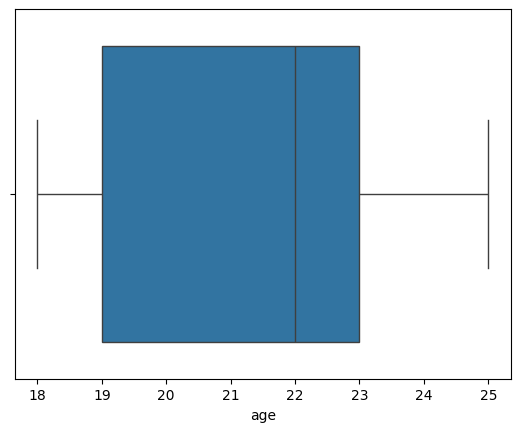

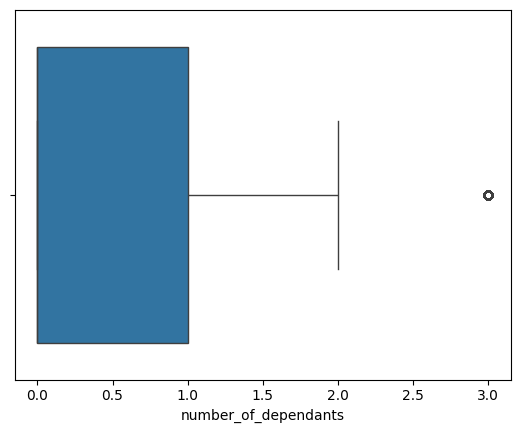

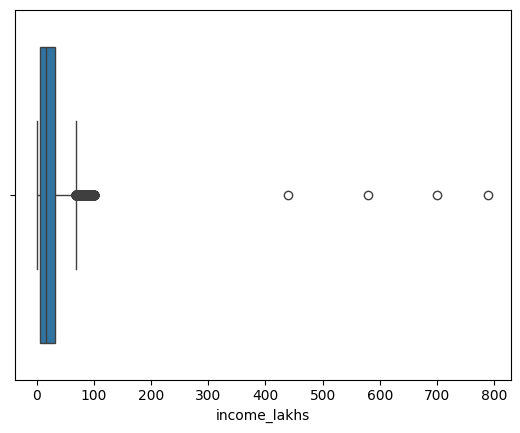

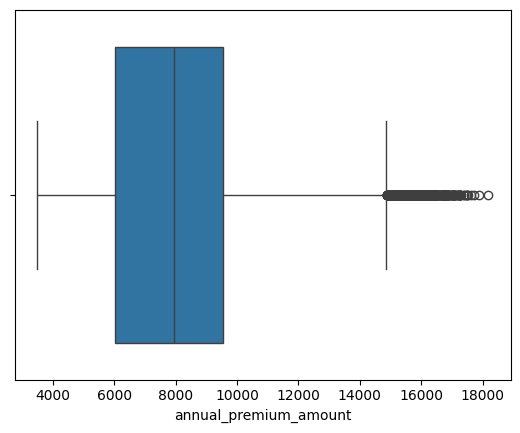

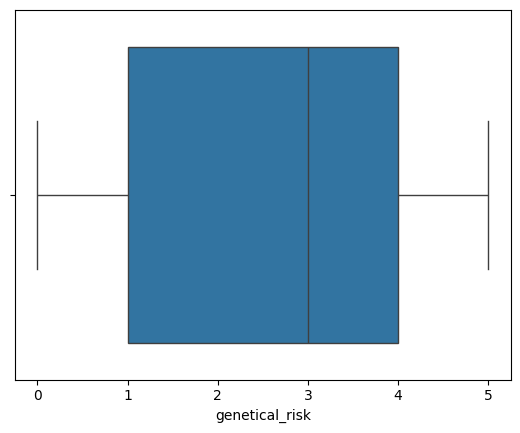

In [15]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

## **Outlier Treatment: Age Column**

In [16]:
df[df['age']>100]['age'].unique()

array([], dtype=int64)

In [17]:
df1 = df[df.age<=100]
df1.age.describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

## **Outlier Treatment: Income Column**

In [18]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower, upper = get_iqr_bounds(df1['income_lakhs'])
lower, upper

(-31.5, 68.5)

In [19]:
df1[df1.income_lakhs>upper].shape

(1295, 14)

**There were many legitimate records that would have been removed if I had used the IQR bounds method. so, I decided to use a simple quantile bound instead.**

In [20]:
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

np.float64(100.0)

In [21]:
df1[df1.income_lakhs>quantile_thresold].shape

(4, 14)

In [22]:
df2 = df1[df1.income_lakhs<=quantile_thresold].copy()
df2.shape

(20086, 14)

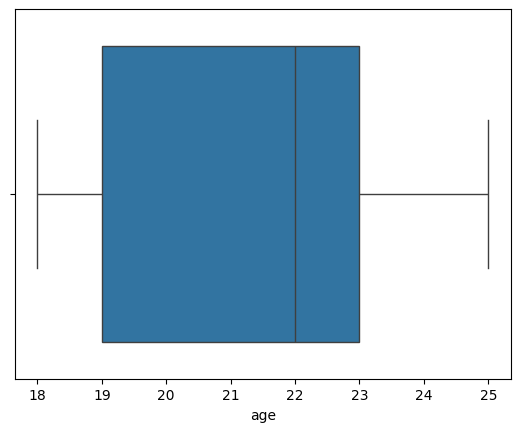

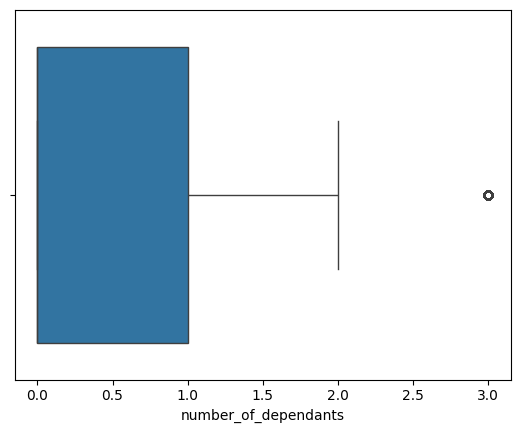

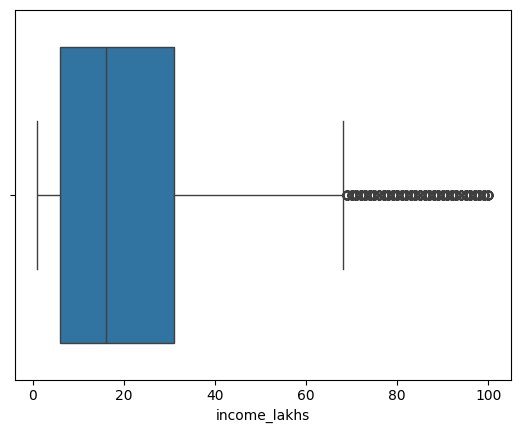

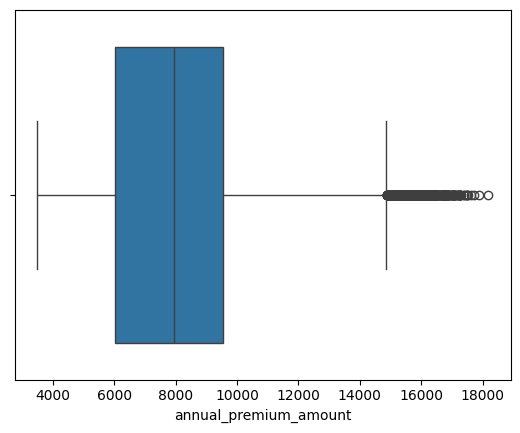

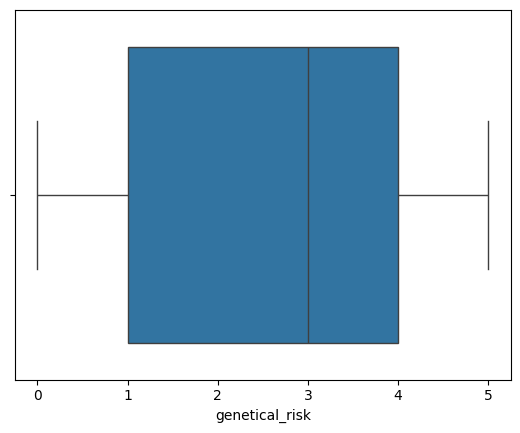

In [23]:
for col in numeric_columns:
    sns.boxplot(x=df2[col])
    plt.show()

### **Data Visualization**

IndexError: index 2 is out of bounds for axis 0 with size 2

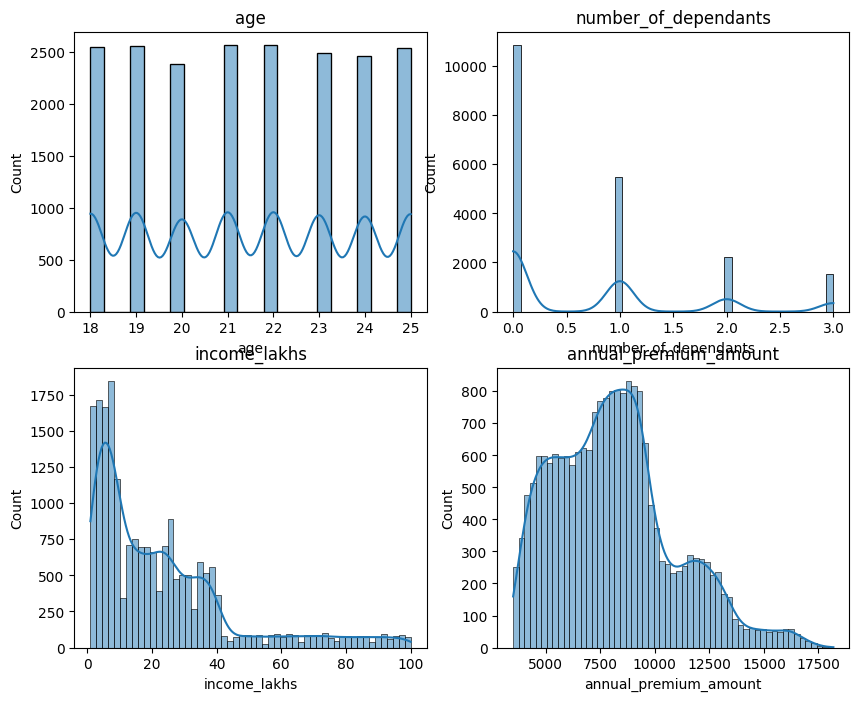

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_columns):
    ax = axs[i//2, i%2]  # Determines the position of the subplot in the grid
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [27]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


## **Bivariate Analysis: Numeric Columns**

In [28]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

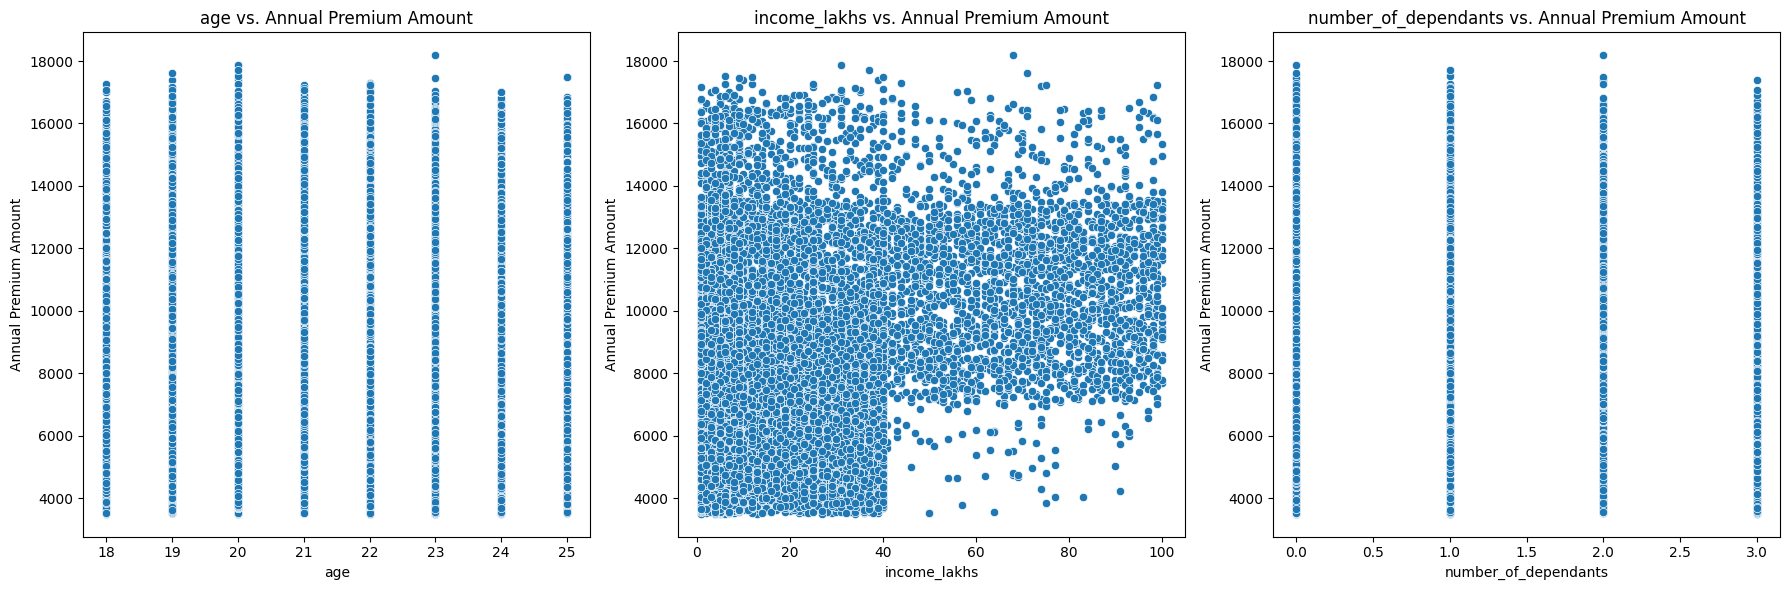

In [29]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

## **2. Categorical Columns**

In [30]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [31]:
df2['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
}, inplace=True)

df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

## **Univariate Analysis**

In [32]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [33]:
pct_count = df2['gender'].value_counts(normalize=True)*100
pct_count

gender
Male      55.038335
Female    44.961665
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

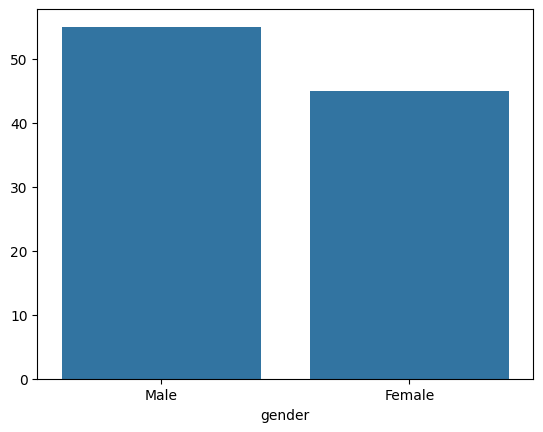

In [34]:
sns.barplot(x=pct_count.index, y=pct_count.values)

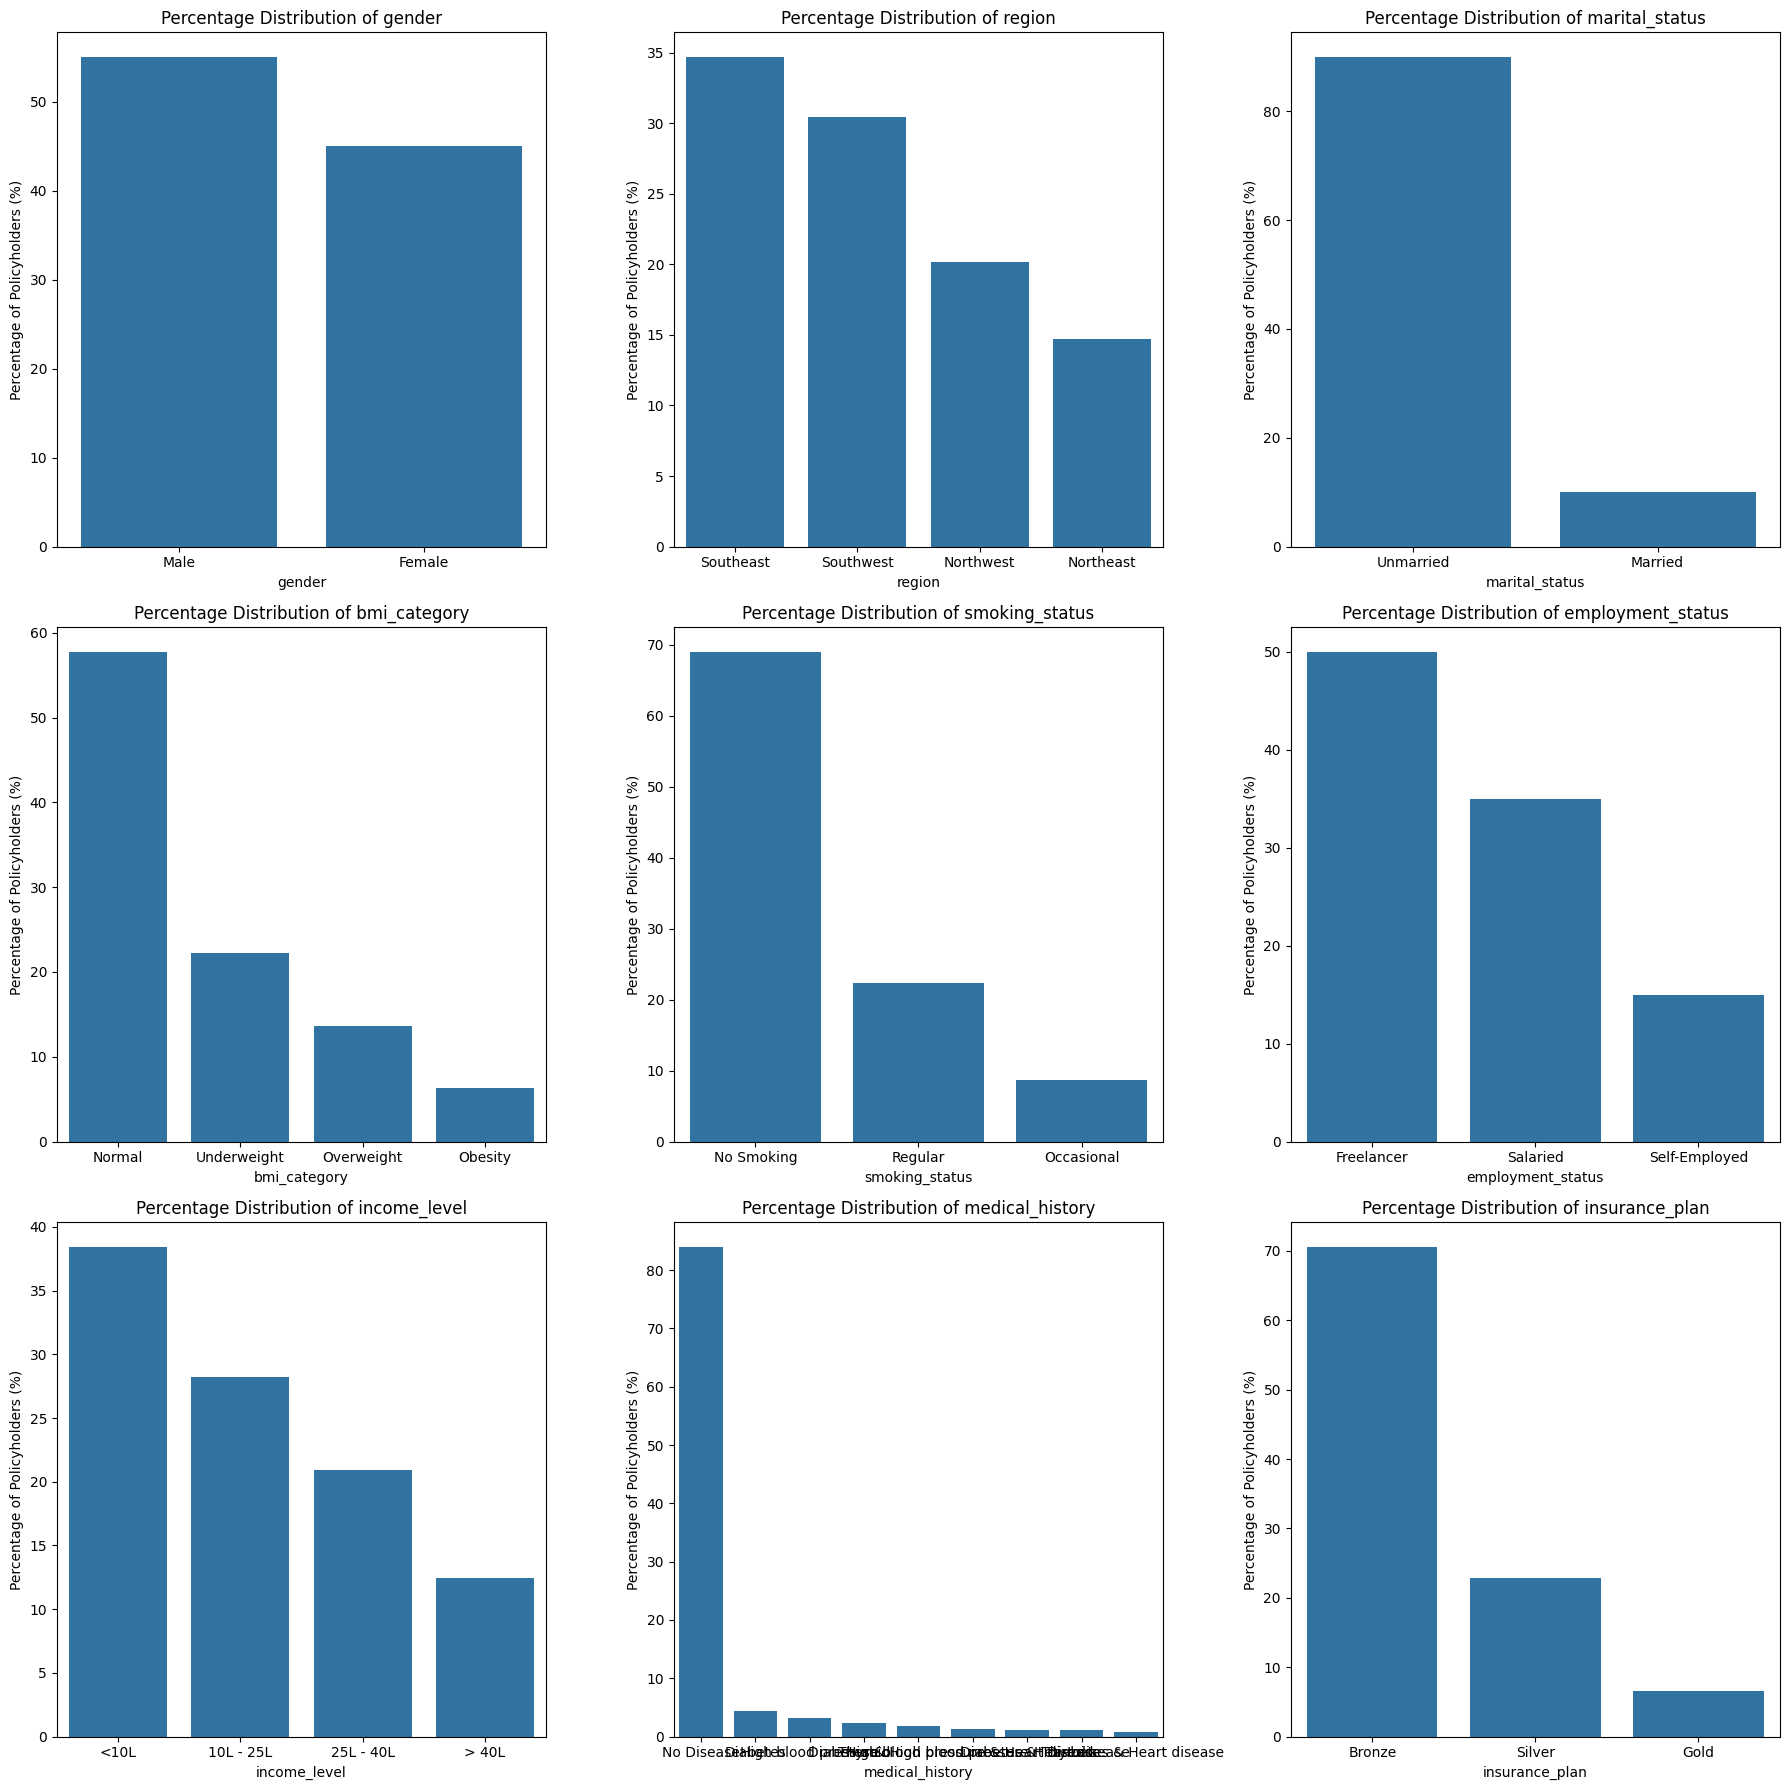

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, categorical_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

## **Bivariate Analysis**

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


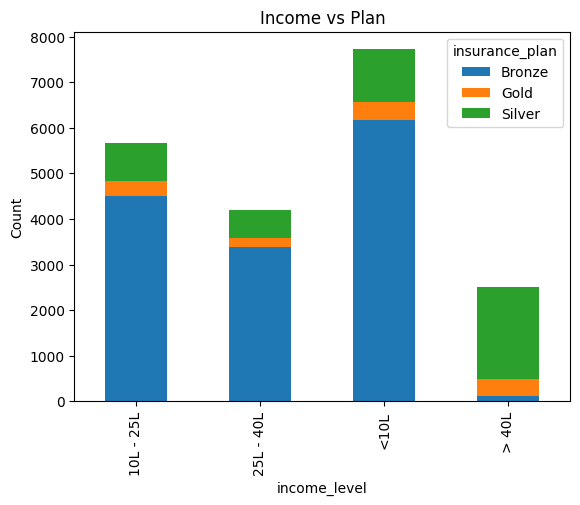

In [36]:
# Cross-tabulation of gender and smoking status
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

# Plotting the crosstab
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

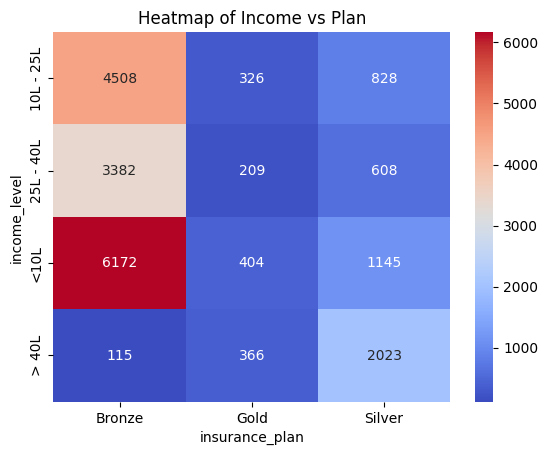

In [37]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

<h2 align="center" style="color:blue; font-size:30px; font-weight:bold;">Feature Engineering</h2>


In [38]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


## **Calculate Risk Score**

In [39]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000


## **Encode Text Columns**

In [40]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

In [41]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [42]:

df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [43]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount',
       'genetical_risk', 'disease1', 'disease2', 'total_risk_score',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20086 entries, 0 to 20095
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              20086 non-null  int64  
 1   number_of_dependants             20086 non-null  int64  
 2   income_level                     20086 non-null  int64  
 3   income_lakhs                     20086 non-null  int64  
 4   medical_history                  20086 non-null  object 
 5   insurance_plan                   20086 non-null  int64  
 6   annual_premium_amount            20086 non-null  int64  
 7   genetical_risk                   20086 non-null  int64  
 8   disease1                         20086 non-null  object 
 9   disease2                         20086 non-null  object 
 10  total_risk_score                 20086 non-null  int64  
 11  normalized_risk_score            20086 non-null  float64
 12  gender_Male            

## **Feature Selection**

In [45]:
df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)                

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0


## **Calculate VIF for Multicolinearity**

In [46]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

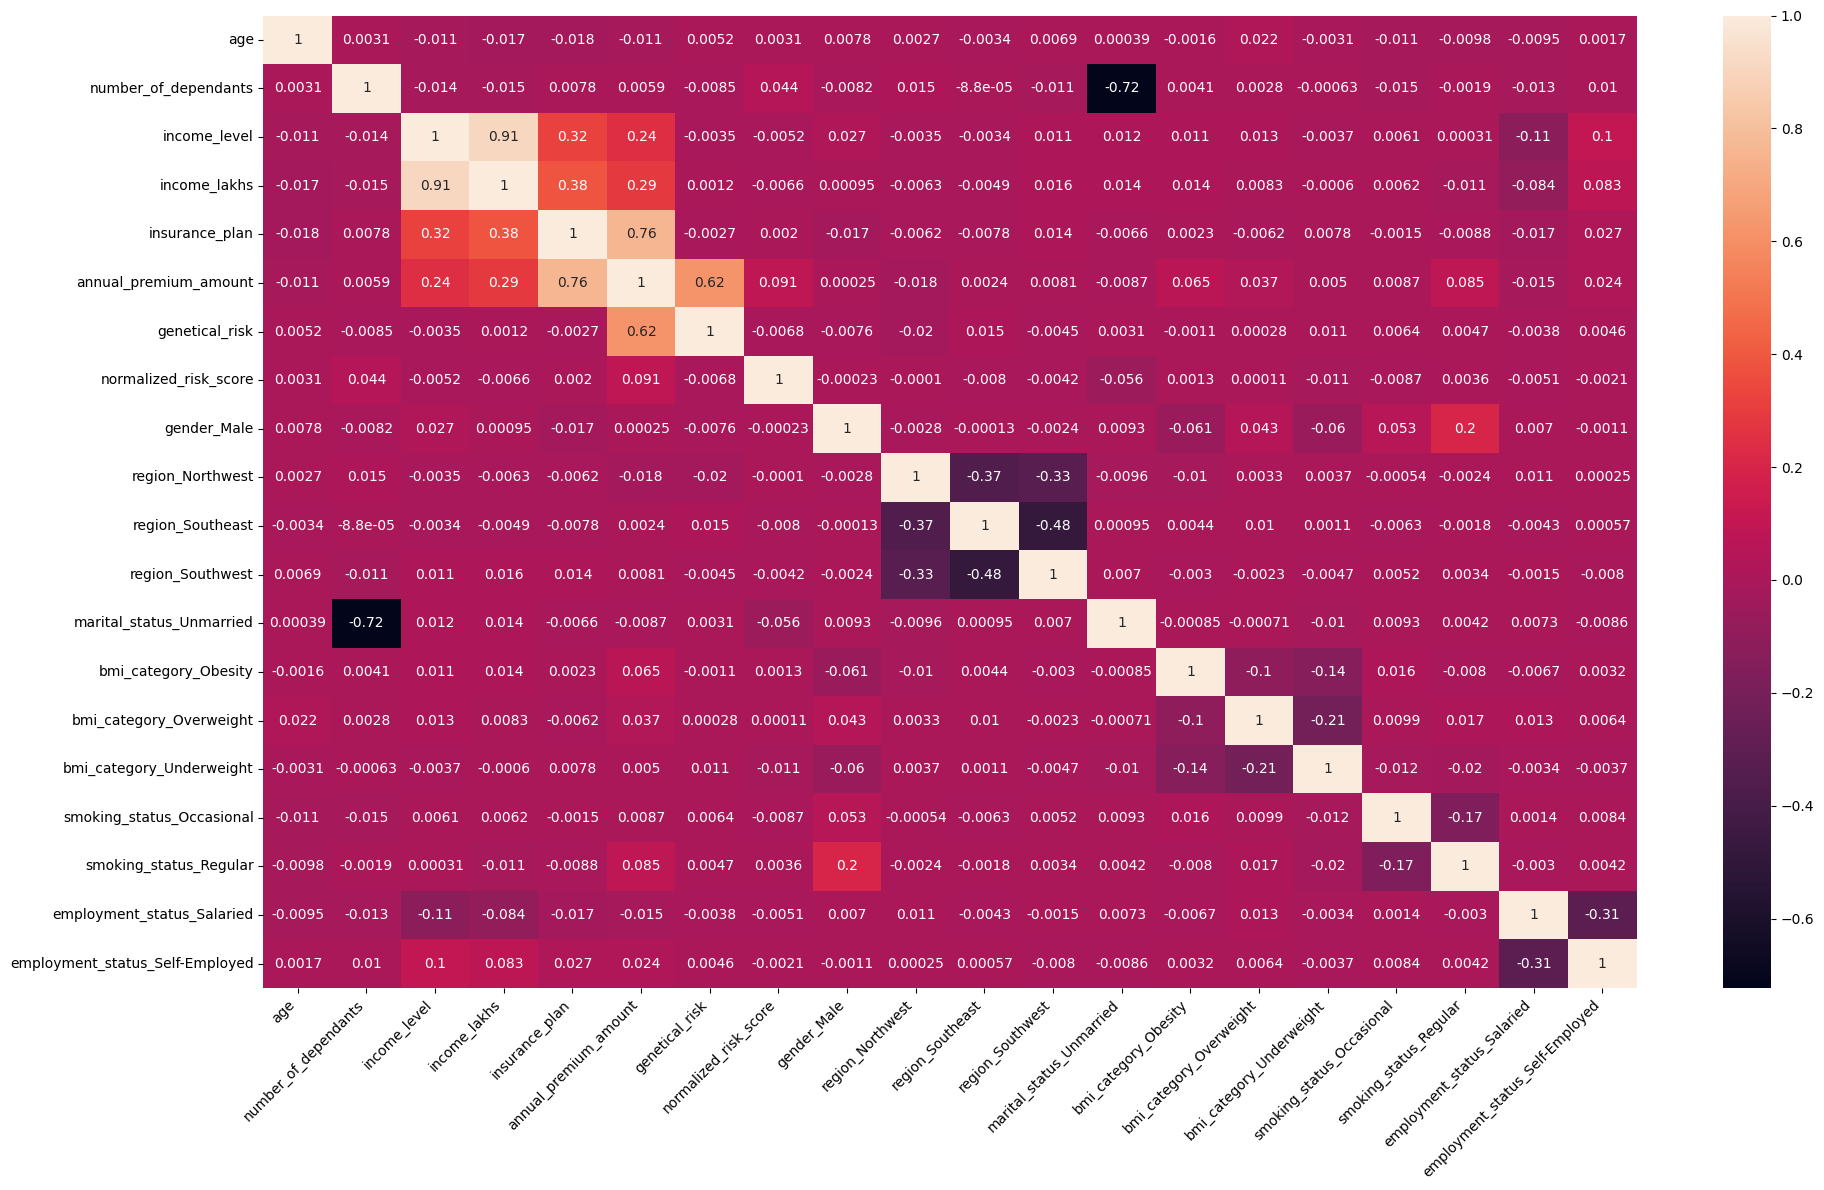

In [47]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [48]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,2.503883,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,1.710184,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [50]:
calculate_vif(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [51]:
calculate_vif(X.drop('income_level', axis="columns"))

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [52]:
# we will drop income_lakhs due to high VIF value
X_reduced = X.drop('income_level', axis="columns")

<h1 align="center" style="color:blue; font-size:30px; font-weight:bold;">Model Training</h1>


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (14060, 18)
x test:  (6026, 18)
y train:  (14060,)
y test:  (6026,)


# **Linear Regression Model**

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

def linear_regression_metrics(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    train_r2 = model.score(X_train, y_train)
    test_r2  = model.score(X_test, y_test)
    mse      = mean_squared_error(y_test, y_pred)
    rmse     = np.sqrt(mse)

    print("Linear Regression Metrics")
    print(f"  Train R² : {train_r2:.4f}")
    print(f"  Test  R² : {test_r2:.4f}")
    print(f"  MSE      : {mse:.4f}")
    print(f"  RMSE     : {rmse:.4f}")

    return {
        "model": model,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "mse": mse,
        "rmse": rmse
    }

# usage
results_lr = linear_regression_metrics(X_train, X_test, y_train, y_test)


Linear Regression Metrics
  Train R² : 0.9883
  Test  R² : 0.9887
  MSE      : 85732.3438
  RMSE     : 292.8009


In [55]:
X_test.shape

(6026, 18)

In [56]:
lr_model = results_lr["model"]


print(f'Coefficients: =======> {lr_model.coef_}')
print(f'Intercept: ==========> {lr_model.intercept_}')

Coefficients: =======> [-7.22903185e+00  1.95361819e+01 -1.26452776e+00  7.00112526e+03
  9.99397746e+02  1.10914836e+03  8.17798831e+00  1.67735268e+00
 -3.27532710e+00  6.31709531e+00  1.60689716e+01  8.12844929e+02
  4.00375598e+02  1.07529819e+02  2.05069661e+02  6.10983280e+02
  3.87836470e-02 -5.24201812e+00]
Intercept: ==========> 3978.823528438261


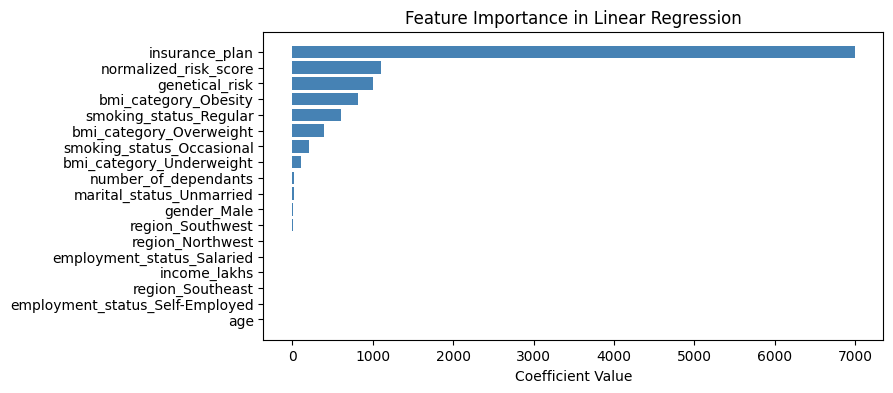

In [57]:
feature_importance = lr_model.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

# **Ridge Regression Model**

In [58]:
def ridge_regression_metrics(X_train, X_test, y_train, y_test, alpha=1.0):
    model_rg = Ridge(alpha=alpha)
    model_rg.fit(X_train, y_train)

    y_pred = model_rg.predict(X_test)

    train_r2 = model_rg.score(X_train, y_train)
    test_r2  = model_rg.score(X_test, y_test)
    mse_rg   = mean_squared_error(y_test, y_pred)
    rmse_rg  = np.sqrt(mse_rg)

    print(f"Ridge Regression (alpha={alpha}) Metrics")
    print(f"  Train R² : {train_r2:.4f}")
    print(f"  Test  R² : {test_r2:.4f}")
    print(f"  MSE      : {mse_rg:.4f}")
    print(f"  RMSE     : {rmse_rg:.4f}")

    return {
        "train_r2": train_r2,
        "test_r2": test_r2,
        "mse": mse_rg,
        "rmse": rmse_rg
    }

# usage
ridge_results = ridge_regression_metrics(X_train, X_test, y_train, y_test, alpha=1.0)

Ridge Regression (alpha=1.0) Metrics
  Train R² : 0.9883
  Test  R² : 0.9887
  MSE      : 85729.9950
  RMSE     : 292.7968


# **XGBoost** 

In [59]:
from xgboost import XGBRegressor
def xgb_regression_metrics(X_train, X_test, y_train, y_test,
                           n_estimators=20, max_depth=3, learning_rate=0.1, random_state=42):
    model_xgb = XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        random_state=random_state
    )

    model_xgb.fit(X_train, y_train)

    y_pred = model_xgb.predict(X_test)

    train_r2 = model_xgb.score(X_train, y_train)
    test_r2  = model_xgb.score(X_test, y_test)
    mse_xgb  = mean_squared_error(y_test, y_pred)
    rmse_xgb = np.sqrt(mse_xgb)

    print(f"XGBoost Regression Metrics (n_estimators={n_estimators}, max_depth={max_depth})")
    print(f"  Train R² : {train_r2:.4f}")
    print(f"  Test  R² : {test_r2:.4f}")
    print(f"  MSE      : {mse_xgb:.4f}")
    print(f"  RMSE     : {rmse_xgb:.4f}")

    return {
        "train_r2": train_r2,
        "test_r2": test_r2,
        "mse": mse_xgb,
        "rmse": rmse_xgb
    }

# usage
xgb_results = xgb_regression_metrics(X_train, X_test, y_train, y_test,
                                     n_estimators=20, max_depth=3)

XGBoost Regression Metrics (n_estimators=20, max_depth=3)
  Train R² : 0.9460
  Test  R² : 0.9470
  MSE      : 403386.0312
  RMSE     : 635.1268


# **Hyperparameter Tuning for XGBoost using RandomizedSearchCV**

In [60]:
def xgb_random_search_metrics(X_train, X_test, y_train, y_test):
    model_xgb = XGBRegressor()

    param_grid = {
        'n_estimators': [20, 40, 50],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
    }

    random_search = RandomizedSearchCV(
        estimator=model_xgb,
        param_distributions=param_grid,
        n_iter=10,
        cv=3,
        scoring='r2',
        random_state=42,
        n_jobs=1
    )

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_

    # Train/Test scores & metrics with best model
    train_r2 = best_model.score(X_train, y_train)
    test_r2  = best_model.score(X_test, y_test)

    y_pred = best_model.predict(X_test)
    mse    = mean_squared_error(y_test, y_pred)
    rmse   = np.sqrt(mse)

    print("Best Params:", random_search.best_params_)
    print(f"CV Best R² : {random_search.best_score_:.4f}")
    print("XGBoost (Best Model) Test Metrics:")
    print(f"  Train R² : {train_r2:.4f}")
    print(f"  Test  R² : {test_r2:.4f}")
    print(f"  MSE      : {mse:.4f}")
    print(f"  RMSE     : {rmse:.4f}")

    return best_model, random_search

# usage
best_xgb_model, xgb_search = xgb_random_search_metrics(X_train, X_test, y_train, y_test)

Best Params: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}
CV Best R² : 0.9879
XGBoost (Best Model) Test Metrics:
  Train R² : 0.9886
  Test  R² : 0.9885
  MSE      : 87426.5156
  RMSE     : 295.6798


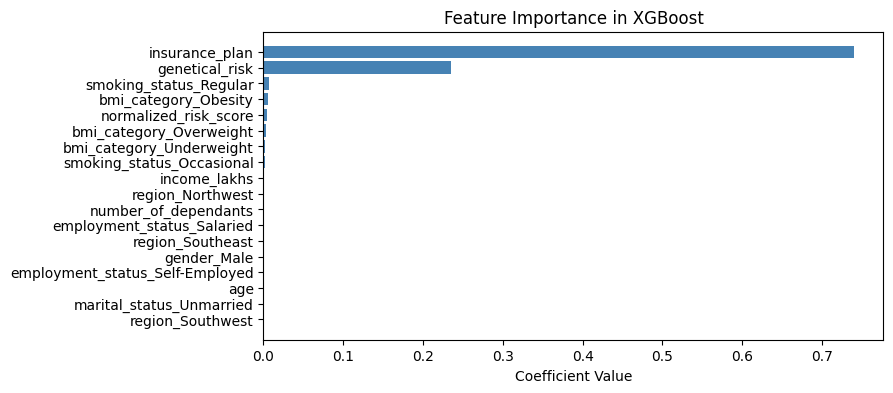

In [61]:
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [62]:
y_pred = best_xgb_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6104.117676,-133.882324,-2.146238
14758,9462,9593.652344,131.652344,1.391380
13205,5152,5619.506348,467.506348,9.074269
14278,6988,7377.886230,389.886230,5.579368
19351,4917,5109.857422,192.857422,3.922258


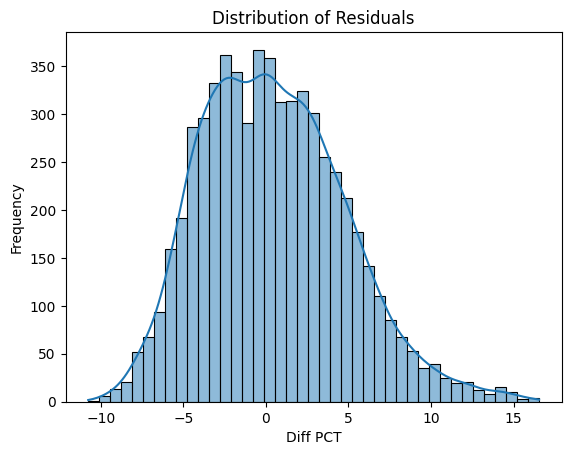

In [63]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [64]:
X_test.shape

(6026, 18)

In [65]:
extreme_error_threshold = 10  # this threshold based on your requirements

In [66]:

# for extreme errors: |diff_pct| >= 10
extreme_mask = results_df['diff_pct'].abs() >= extreme_error_threshold

# DataFrame with only extreme-error customers
extreme_results_df = results_df[extreme_mask]

# Percentage of extreme-error customers
extreme_errors_pct = extreme_results_df.shape[0] * 100 / results_df.shape[0]
print(f"Customers with >= {extreme_error_threshold}% , error: {extreme_errors_pct:.2f}%")

# Seeing worst extreme errors (sorted by percentage difference)
extreme_results_df_sorted = extreme_results_df[abs(extreme_results_df.diff_pct)>10].sort_values("diff_pct", ascending=False)
extreme_results_df_sorted


Customers with >= 10% , error: 2.49%


,actual,predicted,diff,diff_pct
4692,3516,4097.839844,581.839844,16.548346
4169,3517,4097.839844,580.839844,16.515207
12285,3532,4097.839844,565.839844,16.020381
3652,3536,4097.839844,561.839844,15.889136
16580,3538,4097.839844,559.839844,15.823625
...,...,...,...,...
17854,3724,4097.839844,373.839844,10.038664
20050,4725,5198.950195,473.950195,10.030692
18496,5507,6059.176270,552.176270,10.026807
19580,5376,5914.683105,538.683105,10.020147


In [67]:
extreme_results_df_sorted.shape

(150, 4)

##### **I have 2.49% extreme errors which means for 2.49% customers will either overcharge or undercharge by 10% or more**

In [68]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

2.489213408562894

In [69]:
extreme_results_df[abs(extreme_results_df.diff_pct)>10].sort_values("diff_pct",ascending=False)

,actual,predicted,diff,diff_pct
4692,3516,4097.839844,581.839844,16.548346
4169,3517,4097.839844,580.839844,16.515207
12285,3532,4097.839844,565.839844,16.020381
3652,3536,4097.839844,561.839844,15.889136
16580,3538,4097.839844,559.839844,15.823625
...,...,...,...,...
17854,3724,4097.839844,373.839844,10.038664
20050,4725,5198.950195,473.950195,10.030692
18496,5507,6059.176270,552.176270,10.026807
19580,5376,5914.683105,538.683105,10.020147


##### **There were about 4487 customers whom premium plan may overcharged or undercharged by more than 10%.**

In [70]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12669,0.857143,0.0,0.000000,0.0,0,0.0,1,0,1,0,1,0,1,0,0,0,1,0
2918,0.285714,0.0,0.151515,0.0,1,0.0,1,1,0,0,1,0,0,0,0,0,1,0


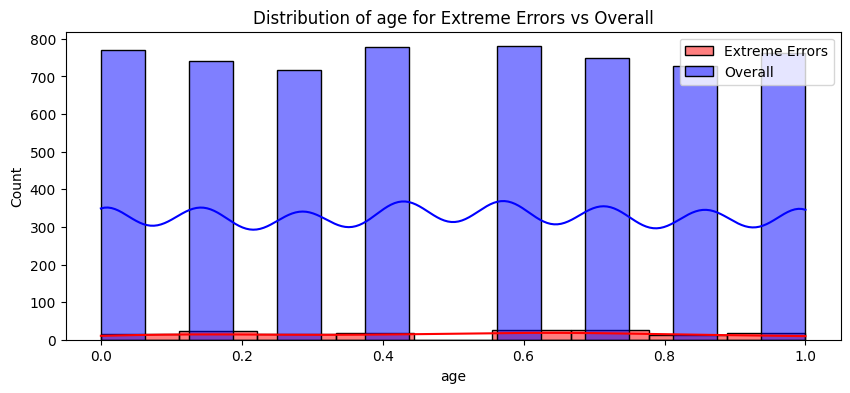

<Figure size 640x480 with 0 Axes>

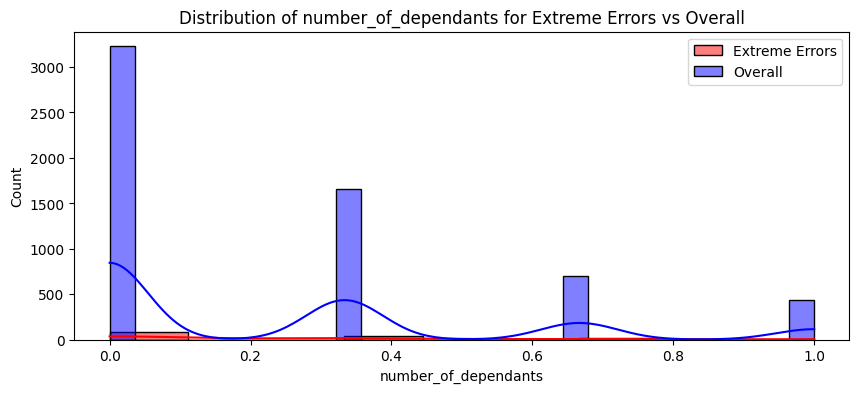

<Figure size 640x480 with 0 Axes>

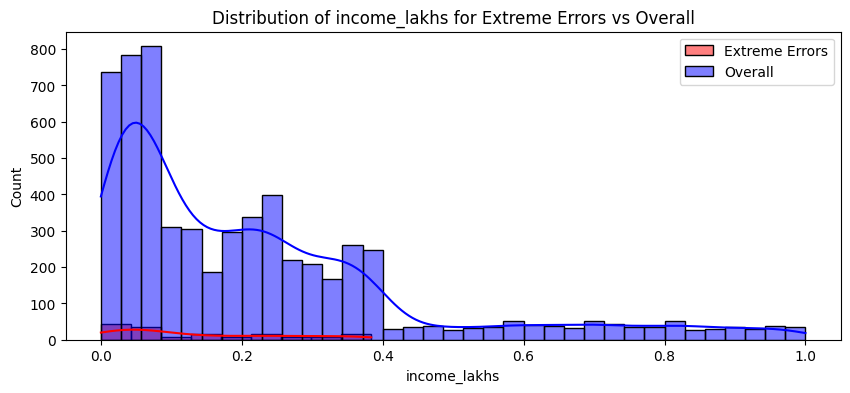

<Figure size 640x480 with 0 Axes>

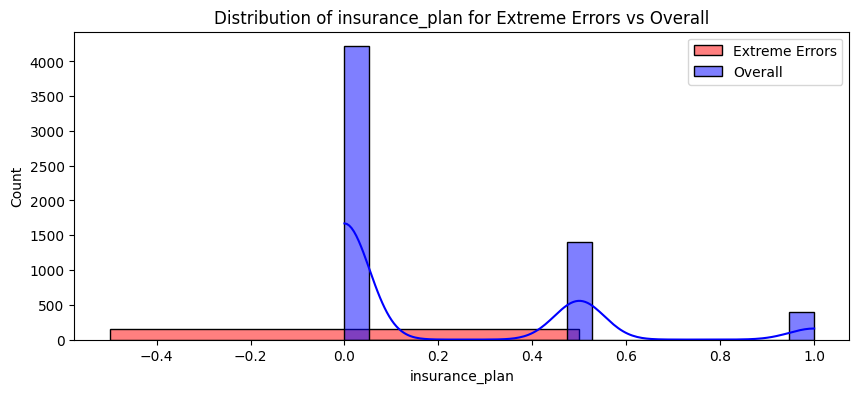

<Figure size 640x480 with 0 Axes>

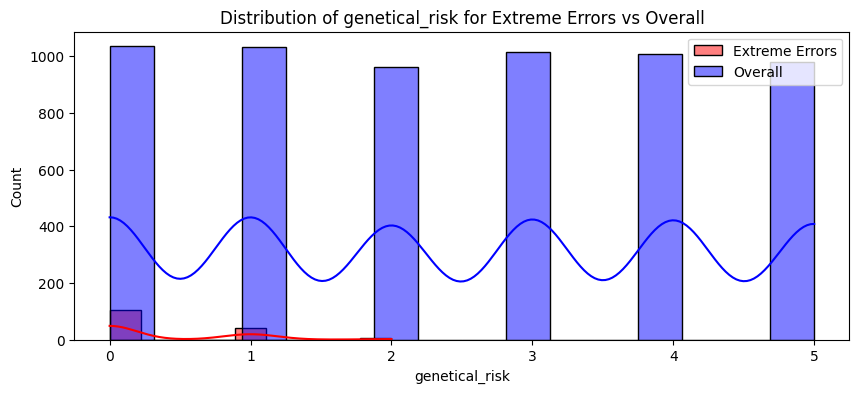

<Figure size 640x480 with 0 Axes>

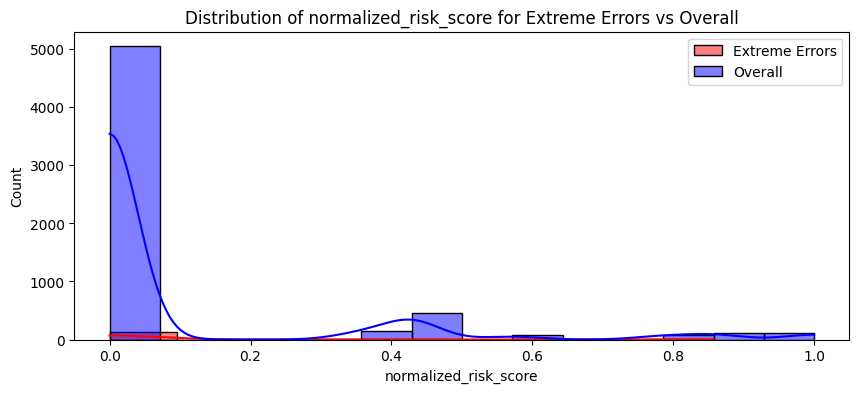

<Figure size 640x480 with 0 Axes>

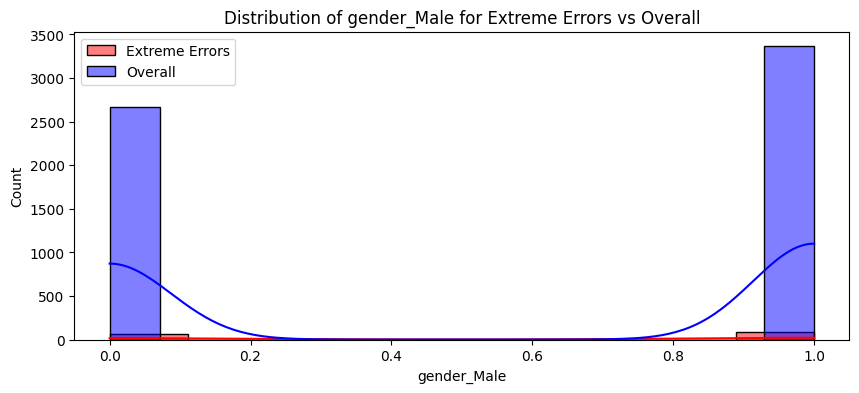

<Figure size 640x480 with 0 Axes>

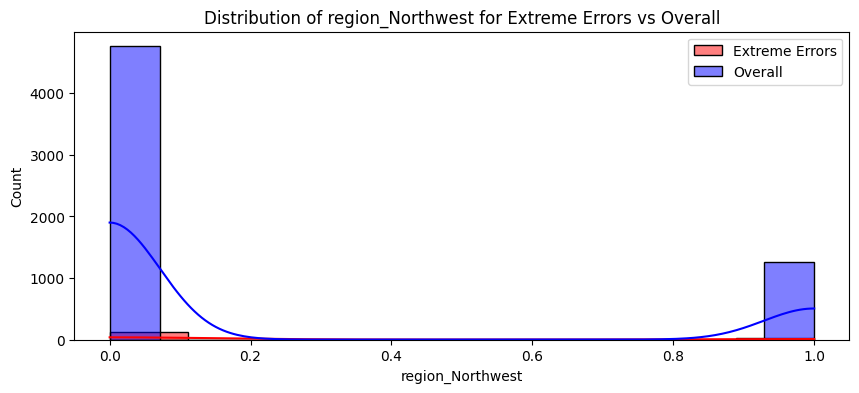

<Figure size 640x480 with 0 Axes>

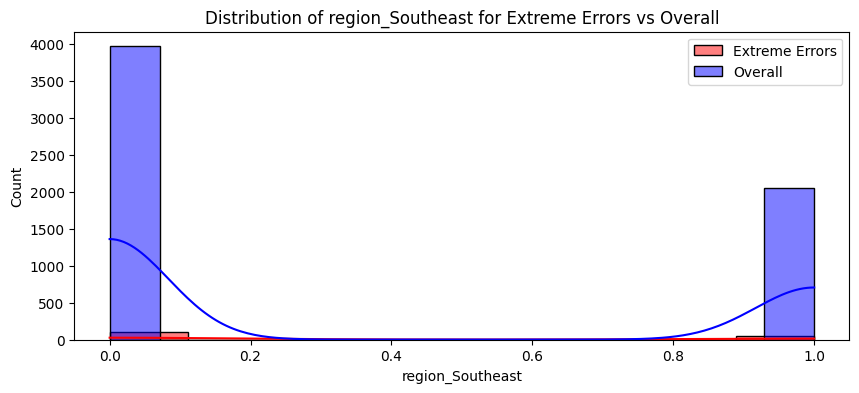

<Figure size 640x480 with 0 Axes>

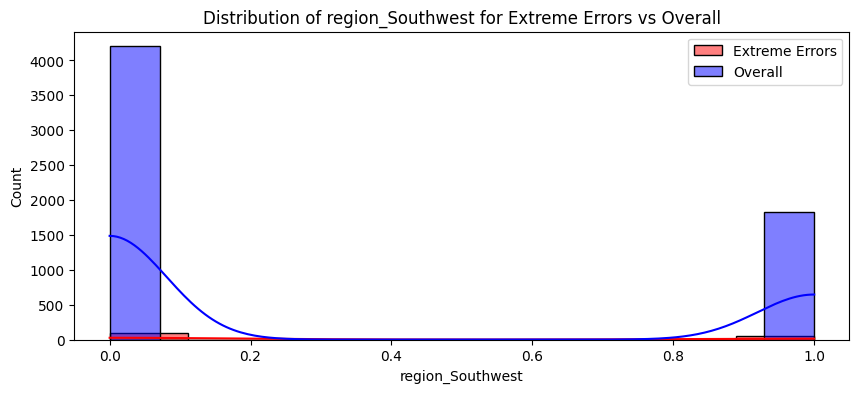

<Figure size 640x480 with 0 Axes>

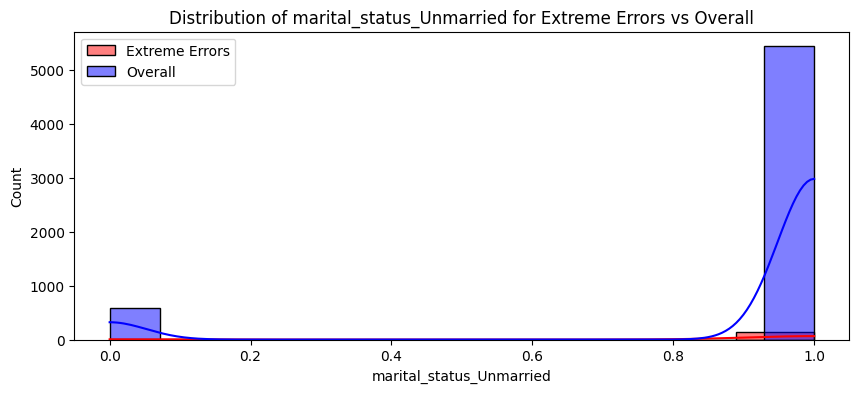

<Figure size 640x480 with 0 Axes>

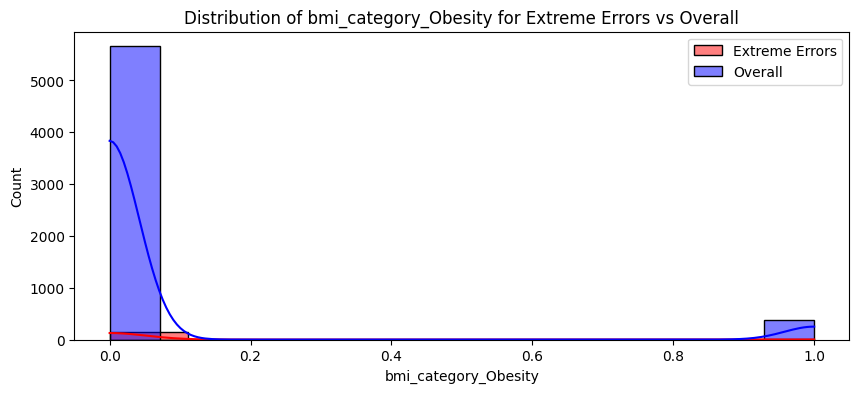

<Figure size 640x480 with 0 Axes>

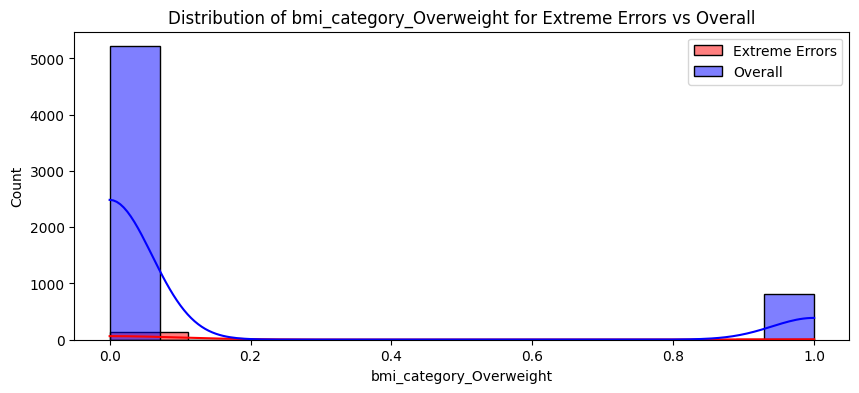

<Figure size 640x480 with 0 Axes>

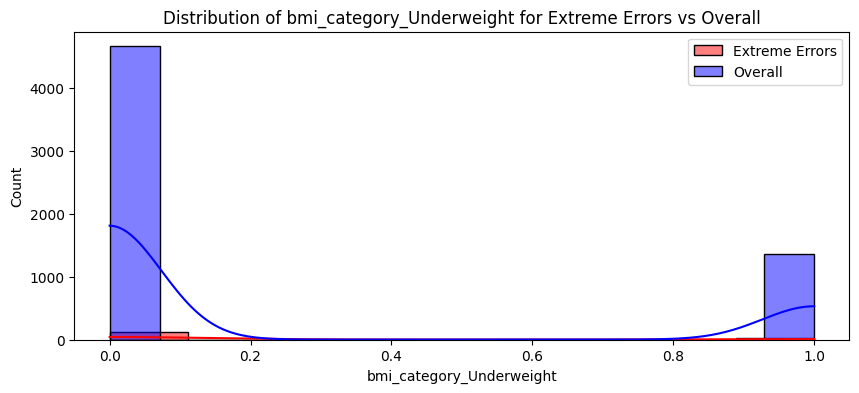

<Figure size 640x480 with 0 Axes>

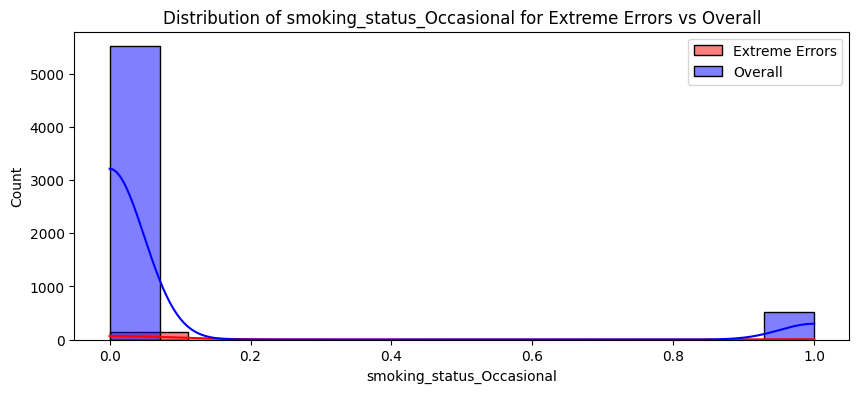

<Figure size 640x480 with 0 Axes>

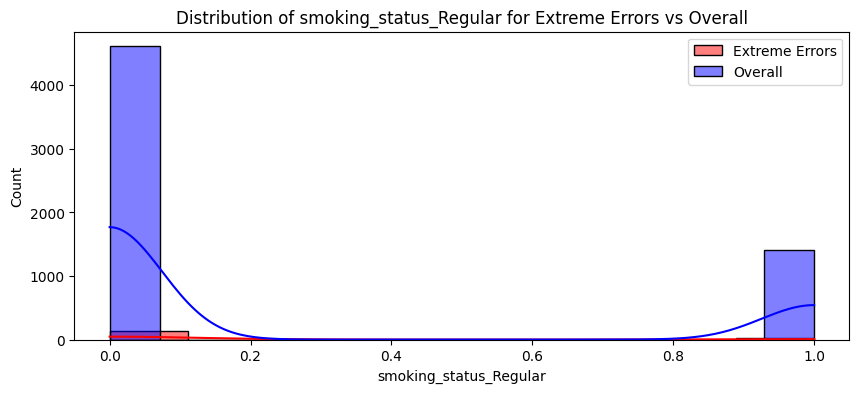

<Figure size 640x480 with 0 Axes>

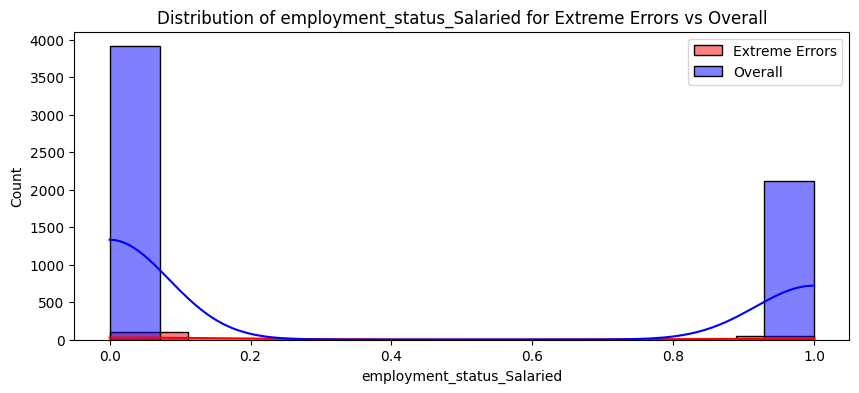

<Figure size 640x480 with 0 Axes>

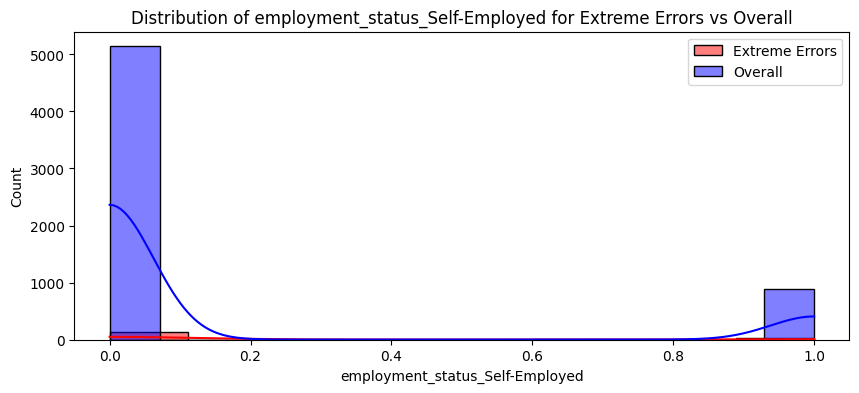

<Figure size 640x480 with 0 Axes>

In [71]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()
    plt.savefig('Distribution of Extreme Errors.png')

#  **Reverse Scaling**

In [72]:
extreme_errors_df['income_level']=-1

In [73]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,24.0,0.0,-2.0,1.0,1.0
1,20.0,0.0,-2.0,16.0,1.0
2,25.0,0.0,-2.0,36.0,1.0
3,22.0,0.0,-2.0,17.0,1.0
4,21.0,1.0,-2.0,24.0,1.0


In [74]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,150.000000,150.000000,150.0,150.000000,150.0
mean,21.526667,0.640000,-2.0,14.573333,1.0
std,2.212523,0.892023,0.0,11.791446,0.0
min,18.000000,0.000000,-2.0,1.000000,1.0
25%,19.250000,0.000000,-2.0,5.000000,1.0
50%,22.000000,0.000000,-2.0,9.000000,1.0
75%,23.000000,1.000000,-2.0,25.000000,1.0
max,25.000000,3.000000,-2.0,39.000000,1.0


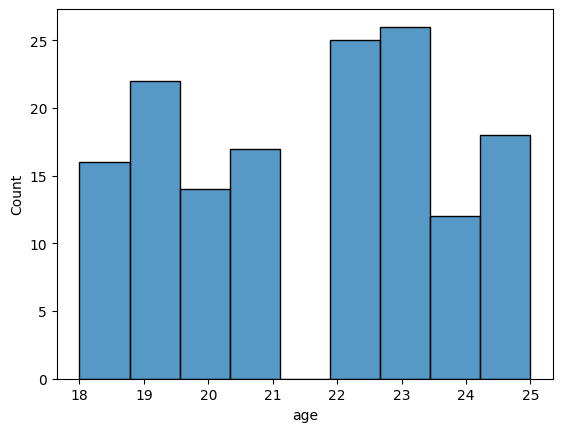

In [75]:
sns.histplot(df_reversed.age)
plt.savefig('age_error.png')

**The Error is less 10% . so No need Any investigation needed**

In [77]:
from joblib import dump
dump(best_xgb_model, "artifacts/model_young.joblib")
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(scaler_with_cols, "artifacts/scaler_young.joblib")


['artifacts/scaler_young.joblib']